# Problem Set 5
### Due by 5PM Thursday 16 May, submitted online via Canvas.

## Instructions (please read everything carefully)

* The questions are given in the cells, below. Your answers should be in this same notebook, beneath each question (insert as many cells as you need), with
  - text in markdown cells. Equations should be in $\LaTeX$
  - fully functional code, with comments so we can understand what you are doing. If you based any part of your code on someone else's initial implementation, cite appropriately.
  - outputs, in presentable format.
    - Plots should have clear titles, axis labels, and legends if needed.
    - Numerical answers should have a sensible number of digits with surrounding text that identifies what is being printed.

* Submit your notebook to Canvas for the specific assignment prior to the deadline. Please use a file name that includes your name and the problem set number, *e.g.*, pset2-Ritz.ipynb.

* Solutions will be posted soon after the deadline, and your work will be graded within one week (usually sooner).

* Problems are typically posted one week in advance. You are encouraged to work together on problems, but the actual code and the full notebook must be your own work.

* The time it takes to write code is often unpredictable, particularly at the beginning of the quarter. Start early.

* If anything is unclear, please ask! The Discussion Forum on Canvas is a convenient method that gives everyone the benefit of your question and the answer(s). Your TA, Ben Lehmann, also provides numerous help sessions throughout the week.

We'll discuss these problems in class on Friday 10 May.




In [1]:
# these were discussed in lecture
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
print(sys.version)

3.5.6 |Anaconda custom (64-bit)| (default, Aug 26 2018, 16:30:03) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


## Problem 1
Try using scipy's curve_fit. (Hint: see *Lectures6.ipynb* for useful examples of how to do all the elements of this problem.) In the next cell you can find the toy (fake) data from Table 7.1 of your textbook, with errors adjusted to be a bit more interesting. 

a) Use these data and fit the Breit-Wigner function (equation 7.64 in your textbook). Plot the data, the errors, and the resulting fitted function. Be sure to quote units on your axes (Energy in MeV, cross-section in *mb*).  


In [2]:
# your code and results here
import scipy.optimize as sop
E = np.array([0., 25., 50., 75., 100., 125., 150., 175., 200.])    # input
y = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
err=np.array([.934, 1.79, 4.15, 8.55, 5.15, 2.15, 1.08, 6.29, 4.14 ])

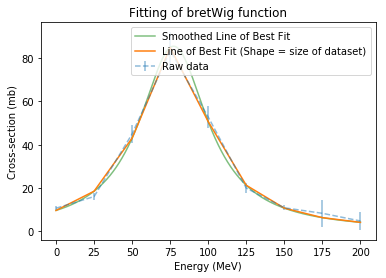

In [2]:
# your code and# ==============================================================================
# Import Statements
# ==============================================================================
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
# ==============================================================================
# Function Definitions
# ==============================================================================
# Code from chi_squared testing grabbed from
# old lab code
def W(n, xdata, ydata, yerror):
    w_of_n = np.sum(((xdata**n)*ydata)/(yerror**2))
    return w_of_n

def U(n, xdata, yerror):
    u_of_n = np.sum((xdata**n)/(yerror**2))
    return u_of_n

def chi_squared(ydata, y_bestfit, sigma):
    cs = np.sum(((ydata - y_bestfit)**2)/(sigma**2))
    csr = cs / (len(ydata)-1)
    return (cs, csr)
    
def bretWig(e, a_1, a_2, a_3):
    # Credit to Jeff for the function signature
    return a_1 / ((e-a_2)**2 + a_3**2 / 4)

def LeastSquaresFit(xdata, ydata, y_sigma, func_pntr):
   # Least Squares Fit was originally a python program written by Prof.
   # David Smith, I have adapted and altered it to be generalized as an
   # individual function.
   # This is some old code I used in Phys-134
   if type(func_pntr) is not type(LeastSquaresFit):
       print("Function Pointer (func_pntr) not provided.")
       return
   xsmooth = np.linspace(np.min(xdata),np.max(xdata), 1000)
   popt, pcov = opt.curve_fit(func_pntr, xdata, ydata,
           sigma=y_sigma, absolute_sigma=1)
   fsmooth_next = func_pntr(xsmooth, *popt)
   plt.plot(xsmooth, fsmooth_next, color='green',
            label='Smoothed Line of Best Fit', alpha=0.5)
   plt.savefig("LSF.pdf")
   return xsmooth, fsmooth_next, popt, pcov
# ==============================================================================
# Data Initalization and Plotting
# ==============================================================================
E = np.array([0., 25., 50., 75., 100., 125., 150., 175., 200.])
y = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
err=np.array([.934, 1.79, 4.15, 8.55, 5.15, 2.15, 1.08, 6.29, 4.14 ])

plt.errorbar(E, y, yerr=err, label="Raw data", linestyle="--", alpha=0.5)
plt.title("Fitting of bretWig function")
plt.xlabel("Energy (MeV)")
plt.ylabel("Cross-section (mb)")

xbest, ybest, popt, popc = LeastSquaresFit(E, y, err, bretWig)
ygood = bretWig(E, *popt)
plt.plot(E, ygood, label="Line of Best Fit (Shape = size of dataset)")
plt.legend(loc=1)
plt.show()



b) Print the resulting fit parameters ($E_r, f_r, \Gamma$) along with their errors, well formatted. Also print the covariance matrix and comment on the sizes of the off-diagonal elements.

In [3]:
# your code and results here
print("E_r = ", popt[0], ", f_r = ", popt[1], ", Gamma = ", popt[2])
print("Covariance Matrix: ")
print(popc)

E_r =  64331.65382284179 , f_r =  77.2491968952416 , Gamma =  54.837073601302336
Covariance Matrix: 
[[1.63034087e+07 2.41988596e+02 1.12941918e+04]
 [2.41988596e+02 1.74235334e+00 5.44453951e-02]
 [1.12941918e+04 5.44453951e-02 1.21894288e+01]]


c) Assess the quality of the fit by calculating the reduced $\chi^2$. Is it a reasonable fit? 

In [5]:
# your code and results here
cs, csr = chi_squared(y, ygood, err)
print("Chi squared = ", cs, "Reduced chi squared = ", csr)
print("A reduced chi-square of << 1 is overfitted")


Chi squared =  4.063730969876401 Reduced chi squared =  0.5079663712345501
A reduced chi-square of << 1 is overfitted


## Problem 2
Revisit the electrostatics problem we did in Lectures7.ipynb, with one side at 100V and the other three sides at ground.

a) improve (or rewrite) the code so that the relaxation iteration stops when the solution has converged to some tolerance. This means that the grid points all change by less than some amount between iterations. Plot the number of iterations needed for a tolerance of $10^{-4}$, $10^{-3}$, $10^{-2}$, and $10^{-1}$.


333.33333333333326
2.3026969634167926
1.1666185985417599
7.759151269979014
5.729774289600442
4.461832211600836
3.591529161560203
2.958754799714214
2.4798515490076056
2.1062632701127626
1.8080136539722957
1.5667406591504118
1.3673445613470392
1.2013848513198866
1.0610781824524906
9.413424585783758
8.38386390695689
7.490658938230865
6.709559597325665
6.02214899732445
5.414459527848692
4.874673011403985
4.392731784097492
3.9615663624381625
3.575107215532114
3.2276674498632474
2.914971174046599
2.633551977140769
2.379558069463883
2.150263889461712
1.9436146226574635
1.7569218078996585
1.5882198512748857
1.4357626330401274
1.297976050601335
1.173440592200592
1.0608757488625997


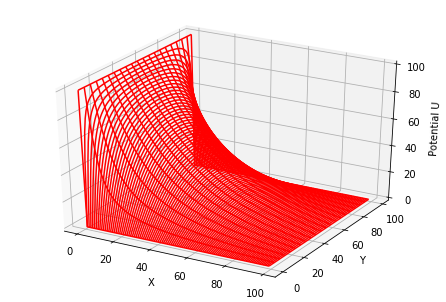

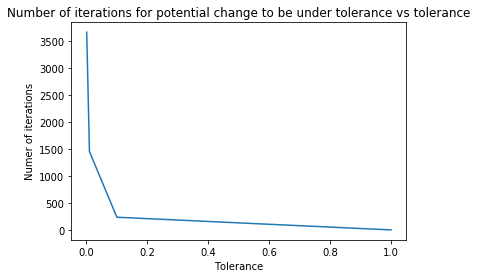

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D 
def functz(V):  
    # Function returns V(x, y)
    z = V[X,Y]                        
    return z


# improve (or rewrite) the code so that the relaxation iteration stops when
# the solution has converged to some tolerance. This means that the grid points
# all change by less than some amount between iterations. Plot the number of
# iterations needed for a tolerance of 10−4, 10−3, 10−2, and 10−1.
Nmax = 100
x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          

# Not analytically
max_delta = 1 # Assume max delta is large so that we keep iterating
needed_iterations = []
V = np.zeros((Nmax, Nmax))   
V[0,:] = 100.0 
iterations = 0 # count the iterations. Initalize outside for loop so it stays
# updated on tolerance change.
trange = [1, 0.1, 0.01, 0.001]
for tolerance in trange:
    while max_delta > tolerance: # Keep looping until acceptable delta reached
        max_delta = 0 # reinit to 0 so we can see max change per iter
        for i in range(1, Nmax-1):                                                
            for j in range(1,Nmax-1):
                old = V[i,j]
                V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])  
                # Using np.concactenate and np.sum you can vectorize
                # the above code, I'm too lazy to do that as of now however
                # and choose to let my code run for 2 minutes instead
                delta = np.abs(V[i, j] - old)
                if delta > max_delta:
                    max_delta = delta
        if iterations % 100 == 0: print(max_delta / tolerance)
        iterations += 1
    needed_iterations.append(iterations)

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig)                                # plot axes
ax.plot_wireframe(X, Y, Z, color = 'r', rstride=5, cstride=1)  # red wireframe, setting the stride values explicitly
ax.set_xlabel('X')                              # label axes
ax.set_ylabel('Y')
ax.set_zlabel('Potential U')
plt.show()

plt.figure()
plt.plot(trange, needed_iterations)
plt.xlabel("Tolerance")
plt.ylabel("Numer of iterations")
plt.title("Number of iterations for potential change to be under tolerance vs tolerance")
plt.show()


b) Draw equipotential contours. You will find matplot's [contour](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html) and [clabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.clabel.html) functions useful here. Set the levels array so the plot looks clear. 

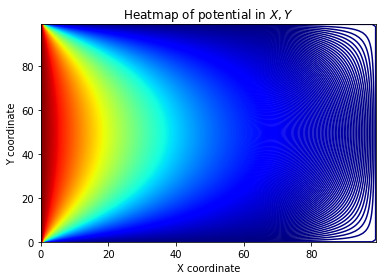

In [3]:
plt.figure()
plt.title("Heatmap of potential in $X, Y$")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.contour(Z, cmap="jet", levels=998)
plt.show()

c) Compare your results with the analytic expression given in your textbook equation (19.18): 
$$U(x,y) = \sum_{n=1,3,5,\dots}^\infty \frac{400}{n\pi} \sin\left( \frac{n\pi x}{L} \right) \frac{\sinh(n\pi y/L)}{\sinh(n\pi)}$$
Experiment with how many terms you need.

You might also enjoy looking at Griffith's E&M book, pages 131, 132, 133, 134, 135 where a similar version of this problem is worked out analytically. 

As a bonus (after you finish the rest of the problem set), you could extend your code to the case of a rectangular space that more closely resembles the Griffiths version.


/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in sinh
  


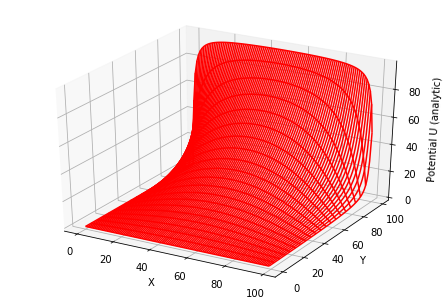

Sorry my graph is flipped


In [5]:
def c_f_sol(x, y):
    L = 100
    total = 0
    n = 1
    while n < 200 or np.abs(term) > 0.00001:
        term = np.sin(n*np.pi*x/L) * 400/(n*np.pi) 
        term *= np.sinh(n*np.pi*y/L)
        term /= np.sinh(n*np.pi)
        total += term
        n += 2
    return total
# Analytically
x = np.linspace(0, Nmax-1, Nmax)
y = x.copy()
vprime = np.zeros((Nmax, Nmax))
for x_a in x:
    for y_a in y:
        vprime[int(y_a), int(x_a)] = c_f_sol(y_a, x_a)
Z = functz(vprime)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig)                                # plot axes
ax.plot_wireframe(X, Y, Z, color = 'r', rstride=5, cstride=1)  # red wireframe, setting the stride values explicitly
ax.set_xlabel('X')                              # label axes
ax.set_ylabel('Y')
ax.set_zlabel('Potential U (analytic)')
plt.show()
print("Sorry my graph is flipped")

## Problem 3
A large, thin metal plate has a 9cm x 9cm square hole cut in it, and a 3cm x 3cm square plate is placed in the middle of the hole:

<img src="p3-1-layout.png" width="50%">

The inner plate is held at ground (0 volts), and the outer plate is at +100 volts.

Calculate and show in a wireframe plot the electrostatic potential in the region between the plates. You'll have to pick a sensibly fine-mesh grid. Experiment with this.

10.0 %.........................................
20.0 %.........................................
30.0 %.........................................
40.0 %.........................................
50.0 %.........................................
60.0 %.........................................
70.0 %.........................................
80.0 %.........................................
90.0 %.........................................
100.0 %.........................................


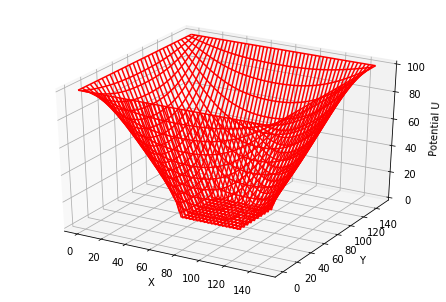

In [8]:
# your code and results here. What did you do to improve the computation time required?
 
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D 
# improve (or rewrite) the code so that the relaxation iteration stops when
# the solution has converged to some tolerance. This means that the grid points
# all change by less than some amount between iterations. Plot the number of
# iterations needed for a tolerance of 10−4, 10−3, 10−2, and 10−1.
def functz(V):  
    # Function returns V(x, y)
    z = V[X,Y]                        
    return z
Nmax = 150
x = range(0, Nmax)
y = range(0, Nmax)
X, Y = np.meshgrid(x,y)          
max_delta = 1 # Assume max delta is large so that we keep iterating
needed_iterations = []
V = np.ones((Nmax, Nmax))   
V[0,:] = 100.0 
V[-1,:] = 100.0
V[:,0] = 100.0
V[:,-1] = 100.0
# The length / width is 150x150. The square whole is a third this value
# Or at 50x50 located in the center. That means at a point , 75x75
# our mesh spans , +- 25 and is initated to zero
iterations = 0 # count the iterations. Initalize outside for loop so it stays
# updated on tolerance change.
trange = [0.01] # this is fine enough
for tolerance in trange:
    while max_delta > tolerance and iterations < 1000: # Keep looping until
        # acceptable delta reached or timeout.
        max_delta = 0 # reinit to 0 so we can see max change per iter
        for i in range(1, len(V)-1):                                                
            for j in range(1, len(V)-1):
                #if iterrange[i][j] == True:
                old = V[i,j]
                V[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])  
                    # Using np.concactenate and np.sum you can vectorize
                    # the above code, I'm too lazy to do that as of now however
                    # and choose to let my code run for 6 minutes instead
                delta = np.abs(V[i, j] - old)
                if delta > max_delta:
                    max_delta = delta
        iterations += 1
        if iterations % 100 == 0:
            print (iterations/10, "%.........................................")
        V[49:99, 49:99] = 0 # Ground the inner plate

Z = functz(V)                          
fig = plt.figure()                              # Create figure
ax = Axes3D(fig)                                # plot axes
ax.plot_wireframe(X, Y, Z, color = 'r', rstride=5, cstride=3)  # red wireframe, setting the stride values explicitly
ax.set_xlabel('X')                              # label axes
ax.set_ylabel('Y')
ax.set_zlabel('Potential U')
plt.show()



b) Draw the equipotential contours. Then show the electric field lines.

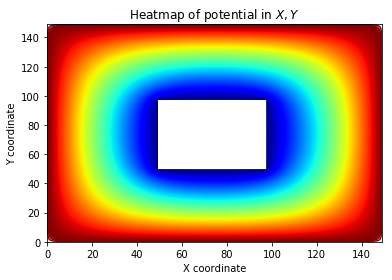

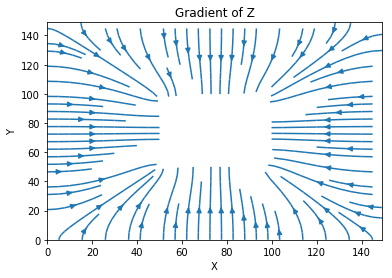

In [9]:
plt.figure()
plt.title("Heatmap of potential in $X, Y$")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.contour(Z, cmap="jet", levels=998)
plt.show()

plt.figure()
plt.title("Gradient of Z")
gradZ = -1*np.array(np.gradient(Z))
plt.streamplot(X, Y, gradZ[1], gradZ[0])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Problem 4
Build upon the work we did on the 1-dim string in Lectures9.ipynb.

a) start by improving the code: make the length, $L$, an input parameter, use the number of points, $N$, to calculate the step size in $x$, and the Courant stability condition to set the step size in $t$. Then, as a test, redo the first animated pluck we did in lecture.

Enter a value for L:
1
Enter a value for N:
100
Enter a value for mu:
0.01
Enter a value for tension:
10
Enter a value for stability:
1.5


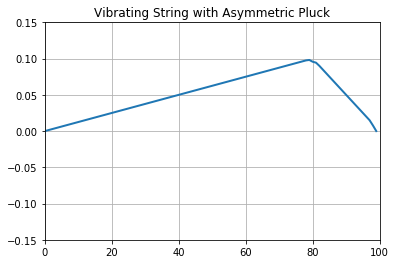

finished


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# Parameters (in problem set 5, you'll add L and derive the x and t steps from
# N and CFL)
L = float(input("Enter a value for L:\n"))
N = int(input("Enter a value for N:\n"))
mu = float(input("Enter a value for mu:\n"))
ten = float(input("Enter a value for tension:\n"))
stability = float(input("Enter a value for stability:\n"))
c = np.sqrt(ten/mu)                                       # Propagation speed
deltaX = L/(N-1)
deltaT = deltaX/(stability*c)
c1 = deltaX/deltaT  # CFL criterion. You'll make better use of this in Problem set 5.
# c is deltax / deltaT
ratio =  c*c/(c1*c1)
# Initialization
# N x's & 3 t's to save memory (only need 3 times for algorithm)

xi = np.zeros( (N, 3), float)
k = np.linspace(0, N-1, N)
ipluck=0.8*L
def init():
    for i in range(0, int(ipluck*N/L)):
        xi[i, 0] = 0.1*i/int(ipluck*N)          # Initial condition: string plucked,shape
    for i in range (int(ipluck*N/L), N):                           # first part of string
        xi[i, 0] = 0.1 - 0.1/(N*(1-ipluck))*(i - int(ipluck*N))                 # second part of string

init()                                     # plot string initial position   
fig=plt.figure()                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N), ylim=(-0.15, 0.15))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String with Asymmetric Pluck")
line, = ax.plot(k, xi[:,0], lw=2)             # x axis, y values, linewidth=2     

# Later time steps
for i in range(1, N-1):                                      # use  algorithm
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, N-1):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(k,xi[:,2])                              # data to plot ,x,y           
    for m in range (0,N):                               # part of algorithm
        xi[m, 0] = xi[m, 1]                               # recycle array 
        xi[m, 1] = xi[m, 2]
    return line,
# next: animation(figure, function,dummy argument: 1      
ani = animation.FuncAnimation(fig, animate,1)           
plt.show() # when I run from jupyter-notebook it doesn't work. When I do from my terminal it does play the animation
# however. I'm not sure what's going on here and don't have enough time to go to office hours. If this pset doesn't
# play the animation on your system can I drop by and show you my code on my computer is exactly the same as in 
# this notebook but works as expected?
print("finished")


b) Change the initial condition to be that of a standing wave. Animate. Does the system evolve as you expect? Experiment with a few different wavelengths.

Enter a value for L:
10
Enter a value for N:
100
Enter a value for mu:
0.01
Enter a value for tension:
10
Enter a value for stability:
1.5


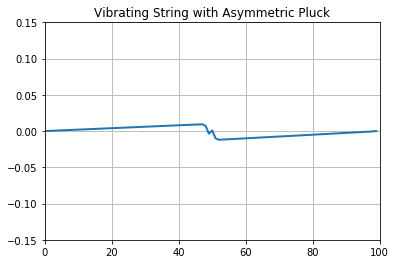

finished


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# Parameters (in problem set 5, you'll add L and derive the x and t steps from
# N and CFL)
L = float(input("Enter a value for L:\n"))
N = int(input("Enter a value for N:\n"))
mu = float(input("Enter a value for mu:\n"))
ten = float(input("Enter a value for tension:\n"))
stability = float(input("Enter a value for stability:\n"))
c = np.sqrt(ten/mu)                                       # Propagation speed
deltaX = L/(N-1)
deltaT = deltaX/(stability*c)
c1 = deltaX/deltaT  # CFL criterion. You'll make better use of this in Problem set 5.
# c is deltax / deltaT
ratio =  c*c/(c1*c1)
# Initialization
# N x's & 3 t's to save memory (only need 3 times for algorithm)

xi = np.zeros( (N, 3), float)
k = np.linspace(0, N-1, N)
ipluck=0.5*L # Set inital condition to be like a standing wave
def init():
    for i in range(0, int(ipluck*N/L)):
        xi[i, 0] = 0.1*i/int(ipluck*N)          # Initial condition: string plucked,shape
    for i in range (int(ipluck*N/L), N):                           # first part of string
        xi[i, 0] = 0.1 - 0.1/(N*(1-ipluck))*(i - int(ipluck*N))                 # second part of string

init()                                     # plot string initial position   
fig=plt.figure()                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N), ylim=(-0.15, 0.15))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String with Asymmetric Pluck")
line, = ax.plot(k, xi[:,0], lw=2)             # x axis, y values, linewidth=2     

# Later time steps
for i in range(1, N-1):                                      # use  algorithm
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, N-1):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(k,xi[:,2])                              # data to plot ,x,y           
    for m in range (0,N):                               # part of algorithm
        xi[m, 0] = xi[m, 1]                               # recycle array 
        xi[m, 1] = xi[m, 2]
    return line,
# next: animation(figure, function,dummy argument: 1      
ani = animation.FuncAnimation(fig, animate,1)           
plt.show()             
print("finished")


c) Now it's your turn to pick an interesting initial condition. Feel free to experiment. Compare the results to your expectation.

Enter a value for L:
1
Enter a value for N:
100
Enter a value for mu:
0.01
Enter a value for tension:
10
Enter a value for stability:
1.5


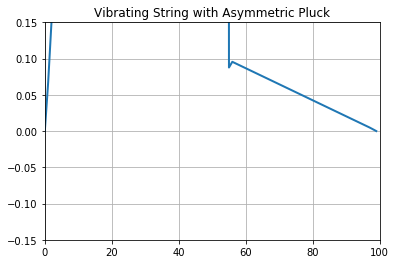

finished


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# Parameters (in problem set 5, you'll add L and derive the x and t steps from
# N and CFL)
L = float(input("Enter a value for L:\n")) # I recommend picking a large value of L for this part ~50
N = int(input("Enter a value for N:\n"))
mu = float(input("Enter a value for mu:\n"))
ten = float(input("Enter a value for tension:\n"))
stability = float(input("Enter a value for stability:\n"))
c = np.sqrt(ten/mu)                                       # Propagation speed
deltaX = L/(N-1)
deltaT = deltaX/(stability*c)
c1 = deltaX/deltaT  # CFL criterion. You'll make better use of this in Problem set 5.
# c is deltax / deltaT
ratio =  c*c/(c1*c1)
# Initialization
# N x's & 3 t's to save memory (only need 3 times for algorithm)

xi = np.zeros( (N, 3), float)
k = np.linspace(0, N-1, N)
ipluck=np.sqrt(0.3)*L # Anything interesting when we make it an irrational number?
def init():
    for i in range(0, int(ipluck*N/L)-1):
        xi[i, 0] = np.sqrt(2)*i**2/int(ipluck*N)          # Initial condition: string plucked,shape
        # let's see what happens when we square i, and multiply my an irraitnoal
    for i in range (int(ipluck*N/L), N):                           # first part of string
        xi[i, 0] = 0.1 - 0.1/(N*(1-ipluck))*(i - int(ipluck*N))                 # second part of string

init()                                     # plot string initial position   
fig=plt.figure()                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N), ylim=(-0.15, 0.15))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String with Asymmetric Pluck")
line, = ax.plot(k, xi[:,0], lw=2)             # x axis, y values, linewidth=2     

# Later time steps
for i in range(1, N-1):                                      # use  algorithm
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, N-1):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(k,xi[:,2])                              # data to plot ,x,y           
    for m in range (0,N):                               # part of algorithm
        xi[m, 0] = xi[m, 1]                               # recycle array 
        xi[m, 1] = xi[m, 2]
    return line,
# next: animation(figure, function,dummy argument: 1      
ani = animation.FuncAnimation(fig, animate,1)           
plt.show()             
print("finished")


d) deliberately violate the Courant stability condition and explore what happens.

Enter a value for L:
1
Enter a value for N:
100
Enter a value for mu:
0.1
Enter a value for tension:
10
Enter a value for stability:
.5


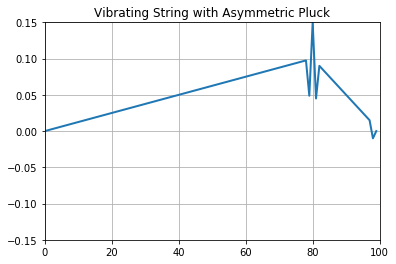

finished


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# Parameters (in problem set 5, you'll add L and derive the x and t steps from
# N and CFL)
L = float(input("Enter a value for L:\n"))
N = int(input("Enter a value for N:\n"))
mu = float(input("Enter a value for mu:\n"))
ten = float(input("Enter a value for tension:\n"))
stability = float(input("Enter a value for stability:\n")) # Make this value less than 1 for instability
# Credit to Anders for helping me tweak my stability
c = np.sqrt(ten/mu)                                       # Propagation speed
deltaX = L/(N-1)
deltaT = deltaX/(stability*c)
c1 = deltaX/deltaT  # CFL criterion. You'll make better use of this in Problem set 5.
# c is deltax / deltaT
ratio =  c*c/(c1*c1)
# Initialization
# N x's & 3 t's to save memory (only need 3 times for algorithm)

xi = np.zeros( (N, 3), float)
k = np.linspace(0, N-1, N)
ipluck=0.8*L
def init():
    for i in range(0, int(ipluck*N/L)):
        xi[i, 0] = 0.1*i/int(ipluck*N)          # Initial condition: string plucked,shape
    for i in range (int(ipluck*N/L), N):                           # first part of string
        xi[i, 0] = 0.1 - 0.1/(N*(1-ipluck))*(i - int(ipluck*N))                 # second part of string

init()                                     # plot string initial position   
fig=plt.figure()                           # figure to plot (a changing line)
# select axis; 111: only one plot, x,y, scales given
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, N), ylim=(-0.15, 0.15))
ax.grid()                                                       # plot a grid
plt.title("Vibrating String with Asymmetric Pluck")
line, = ax.plot(k, xi[:,0], lw=2)             # x axis, y values, linewidth=2     

# Later time steps
for i in range(1, N-1):                                      # use  algorithm
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, N-1):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(k,xi[:,2])                              # data to plot ,x,y           
    for m in range (0,N):                               # part of algorithm
        xi[m, 0] = xi[m, 1]                               # recycle array 
        xi[m, 1] = xi[m, 2]
    return line,
# next: animation(figure, function,dummy argument: 1      
ani = animation.FuncAnimation(fig, animate,1)           
plt.show()             
print("finished")
